In [1]:
import geopandas as gpd

bigs = gpd.read_file('suur_kohanimi.gpkg')

smalls = gpd.read_file('vaike_kohanimi.gpkg')

In [2]:
smalls.count()

Jkn                                 2169
Kohanimi                            2169
Keel                                2169
Kohanime staatus                    2169
Kohanime olek                       2169
Nimeobjekti liik                    2169
Lisainfo                               1
Maakond,omavalitsus,asustusüksus    2169
X                                   2151
Y                                   2151
geometry                            2169
dtype: int64

In [3]:
est = gpd.read_file(r"../data_archive/estonia_without_lakes.shp")
display(est.crs)
est

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,FID_estoni,OBJECTID,NAME,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,...,kkr_kood,nimetus,knr_id,markused,vajalik,vajalik_t,_count,_sum,_mean,geometry
0,0,76,Estonia,EST,EE,EN,Estonia,Estonia,Estonie,Estonia,...,None,None,0.0,None,0,None,131241100.0,7.718100e+09,58.808563,"MULTIPOLYGON Z (((25.82342 59.67719 0.00000, 2..."


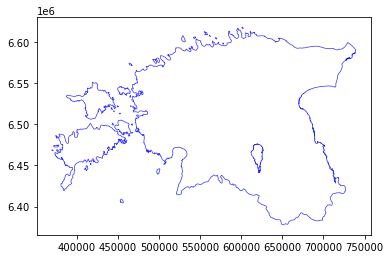

In [4]:
est3301 = est.to_crs(epsg=3301)
base = est3301.plot(facecolor="none", edgecolor='blue', lw=0.7, alpha=0.8)

In [5]:
ba = est3301.total_bounds
minx, miny, maxx, maxy = ba[0],ba[1],ba[2],ba[3]

print(f"x dist m = {maxx-minx }")
print(f"y dist m = {maxy-miny}")

x dist m = 369542.849655783
y dist m = 240410.9813869521


In [6]:
from shapely.geometry import box, Polygon, Point
import pandas as pd

square_length = 10000

x_len = int ( (maxx-minx) / square_length )
y_len = int ( (maxy-miny) / square_length )

grid_cells = []
counter = 0

for i in range(x_len):
    for j in range(y_len):
        lx = minx + (i*square_length)
        ux = minx + (i*square_length) + square_length
        ly = miny + (j*square_length)
        uy = miny + (j*square_length) + square_length
        that_p = box(lx, ly, ux, uy)
        counter = counter + 1
        grid_cells.append({'geometry': that_p, 'idx': counter})

grid = gpd.GeoDataFrame(pd.DataFrame(grid_cells), geometry='geometry', crs=3301)

# grid.plot()

In [7]:
import shapely.speedups

shapely.speedups.enable()

In [8]:
from geopandas.tools import sjoin

grids_bigs = sjoin(grid, bigs,  how="inner", op="contains")
grids_bigs

,geometry,idx,index_right,Jkn,Kohanimi,Keel,Kohanime staatus,Kohanime olek,Nimeobjekti liik,Lisainfo,"Maakond,omavalitsus,asustusüksus",X,Y
8,"POLYGON ((379616.323 6457690.671, 379616.323 6...",9,1553,1554,Suureniidi,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Karala küla",6461887.36,377744.82
8,"POLYGON ((379616.323 6457690.671, 379616.323 6...",9,495,496,Suurrahu,eesti,mitteametlik esikohanimi,kehtiv,"saarestik, saar, laid, kare, maa, rahu",None,"Saare maakond, Saaremaa vald, Atla küla",6465655.50,376058.10
9,"POLYGON ((379616.323 6467690.671, 379616.323 6...",10,126,127,Suurispuu tee,eesti,ametlik põhinimi,kehtiv,"tee, ringtee ...",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6467852.04,376954.21
9,"POLYGON ((379616.323 6467690.671, 379616.323 6...",10,411,412,Suurispuu nukk,eesti,mitteametlik esikohanimi,kehtiv,"neem, nina, nukk, ots",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6468083.90,377472.30
9,"POLYGON ((379616.323 6467690.671, 379616.323 6...",10,5,6,Suur kolmekivurahu,eesti,mitteametlik muu nimi,kehtiv,"saarestik, saar, laid, kare, maa, rahu",None,"Saare maakond, Saaremaa vald, Eeriksaare küla",6470513.00,374402.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,"POLYGON ((729616.323 6587690.671, 729616.323 6...",862,1662,1663,Suureniidu,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Ida-Viru maakond, Narva-Jõesuu linn, Udria küla",6589334.32,723151.36
861,"POLYGON ((729616.323 6587690.671, 729616.323 6...",862,534,535,Suurniit,eesti,mitteametlik esikohanimi,kehtiv,avamaastik,None,"Ida-Viru maakond, Narva-Jõesuu linn, Udria küla",6589476.00,723079.00
861,"POLYGON ((729616.323 6587690.671, 729616.323 6...",862,1661,1662,Suurtüki,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Ida-Viru maakond, Narva-Jõesuu linn, Meriküla",6592755.10,724321.32
862,"POLYGON ((729616.323 6597690.671, 729616.323 6...",863,252,253,Suur-Lootsi tänav,eesti,ametlik põhinimi,kehtiv,liikluspind,None,"Ida-Viru maakond, Narva-Jõesuu linn, Narva-Jõe...",6598777.43,729151.84


In [9]:
grids_smalls = sjoin(grid, smalls,  how="inner", op="contains")
grids_smalls

,geometry,idx,index_right,Jkn,Kohanimi,Keel,Kohanime staatus,Kohanime olek,Nimeobjekti liik,Lisainfo,"Maakond,omavalitsus,asustusüksus",X,Y
8,"POLYGON ((379616.323 6457690.671, 379616.323 6...",9,188,189,Väike-Nonni järv,eesti,mitteametlik esikohanimi,kehtiv,"järvistu, järv, lais, järvesopp, laugas",None,"Saare maakond, Saaremaa vald, Karala küla // S...",6460089.70,379005.56
9,"POLYGON ((379616.323 6467690.671, 379616.323 6...",10,1557,1558,Väike-Kõrtsi,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Vilsandi küla",6472926.44,373459.28
9,"POLYGON ((379616.323 6467690.671, 379616.323 6...",10,1911,1912,Väike-Vilsandi poolsaar,eesti,mitteametlik esikohanimi,kehtiv,poolsaar,None,"Saare maakond, Saaremaa vald, Vilsandi küla",6473605.00,377141.00
10,"POLYGON ((379616.323 6477690.671, 379616.323 6...",11,1387,1388,Väike-Kadaka,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Kõruse küla",6479530.94,379440.95
28,"POLYGON ((389616.323 6417690.671, 389616.323 6...",29,1286,1287,Väike-Kaardi,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Saare maakond, Saaremaa vald, Läbara küla",6424006.88,386922.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,"POLYGON ((729616.323 6417690.671, 729616.323 6...",845,362,363,Väikene org,eesti,mitteametlik esikohanimi,kehtiv,"org, ürgorg, nõgu, lohk",None,"Võru maakond, Setomaa vald, Kundruse küla",6421656.00,721008.00
844,"POLYGON ((729616.323 6417690.671, 729616.323 6...",845,768,769,Väike-Kasetalu,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Võru maakond, Setomaa vald, Korela küla",6421742.56,720637.47
844,"POLYGON ((729616.323 6417690.671, 729616.323 6...",845,1637,1638,Väikepõllu,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Võru maakond, Setomaa vald, Saabolda küla",6421938.65,723573.18
844,"POLYGON ((729616.323 6417690.671, 729616.323 6...",845,460,461,Väike-Ülemiste,eesti,ametlik põhinimi,kehtiv,"maaüksus, krunt, talu",None,"Võru maakond, Setomaa vald, Saatse küla",6421972.82,724673.75


In [10]:
def take_first_one(idx, subdf, big_small):
    geometry = subdf.iloc[0]['geometry']
    # idx
    Kohanimi = subdf.iloc[0]['Kohanimi']
    count = len(subdf.index)
    # big_small
    return {'idx': idx, 'geometry': geometry, 'count': count, 'big_small': big_small}

collector = []
collector_b = []
collector_s = []

for idx, subdf in grids_smalls.groupby('idx'):
    exp = take_first_one(idx, subdf, big_small=-1)
    collector.append(exp)
    collector_s.append(exp)

for idx, subdf in grids_bigs.groupby('idx'):
    exp = take_first_one(idx, subdf, big_small=1)
    collector.append(exp)
    collector_b.append(exp)

In [11]:
aggs = gpd.GeoDataFrame(pd.DataFrame(collector), geometry='geometry', crs=3301)
aggs_b = gpd.GeoDataFrame(pd.DataFrame(collector_b), geometry='geometry', crs=3301)
aggs_s = gpd.GeoDataFrame(pd.DataFrame(collector_s), geometry='geometry', crs=3301)

In [12]:
aggs

,idx,geometry,count,big_small
0,9,"POLYGON ((379616.323 6457690.671, 379616.323 6...",1,-1
1,10,"POLYGON ((379616.323 6467690.671, 379616.323 6...",2,-1
2,11,"POLYGON ((379616.323 6477690.671, 379616.323 6...",1,-1
3,29,"POLYGON ((389616.323 6417690.671, 389616.323 6...",3,-1
4,30,"POLYGON ((389616.323 6427690.671, 389616.323 6...",4,-1
...,...,...,...,...
903,844,"POLYGON ((729616.323 6407690.671, 729616.323 6...",2,1
904,845,"POLYGON ((729616.323 6417690.671, 729616.323 6...",3,1
905,861,"POLYGON ((729616.323 6577690.671, 729616.323 6...",1,1
906,862,"POLYGON ((729616.323 6587690.671, 729616.323 6...",3,1


<AxesSubplot:>

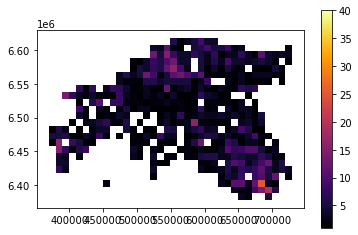

In [81]:
aggs_b.plot(column='count', cmap='inferno', vmin=1, vmax=40, legend=True)

<AxesSubplot:>

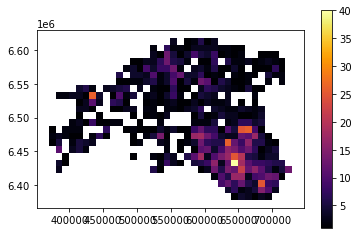

In [82]:
aggs_s.plot(column='count', cmap='inferno', vmin=1, vmax=40, legend=True)

In [15]:
aggs_b.describe()

,idx,count,big_small
count,468.000000,468.000000,468.0
mean,496.382479,4.027778,1.0
std,212.973295,3.314571,0.0
min,9.000000,1.000000,1.0
25%,351.750000,2.000000,1.0
50%,524.500000,3.000000,1.0
75%,670.250000,5.000000,1.0
max,863.000000,25.000000,1.0


In [16]:
aggs_s.describe()

,idx,count,big_small
count,440.000000,440.000000,440.0
mean,508.397727,4.854545,-1.0
std,208.388772,5.037601,0.0
min,9.000000,1.000000,-1.0
25%,377.750000,2.000000,-1.0
50%,545.500000,3.000000,-1.0
75%,675.250000,6.000000,-1.0
max,845.000000,40.000000,-1.0


In [17]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import contextily as ctx
import matplotlib.pyplot as plt

# create classifier
scheme = mc.Quantiles(aggs[['count']], k=5)

In [18]:
aggs84 = aggs.to_crs(4326)
aggs84_s = aggs_s.to_crs(4326)
aggs84_b = aggs_b.to_crs(4326)

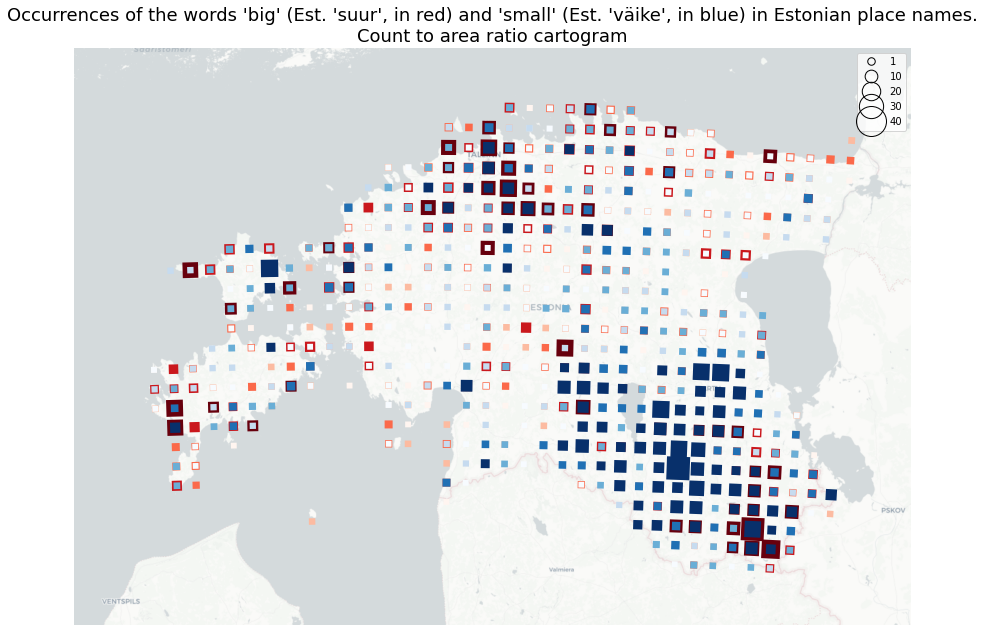

In [19]:
ax = gplt.webmap(df=aggs84, projection=gcrs.WebMercator(), zoom=8, provider=ctx.providers.CartoDB.Positron, figsize=(15,12))

ax = gplt.cartogram(
    aggs84_b, scale='count', projection=gcrs.WebMercator(),
    # legend_kwargs={'bbox_to_anchor': (1, 1)},
    # legend_var='hue',
    # legend=True, 
    hue='count',
    scheme=scheme,
    cmap='Reds',
    limits=(0.3, 1.2),
    ax=ax
)

ax = gplt.cartogram(
    aggs84_s, scale='count', projection=gcrs.WebMercator(),
    legend=True,
    # legend_kwargs={'bbox_to_anchor': (1, 1)},
    legend_var='scale',
    hue='count',
    scheme=scheme,
    cmap='Blues',
    limits=(0.3, 1.2),
    ax=ax
)

# set a title
plt.title("Occurrences of the words 'big' (Est. 'suur', in red) and 'small' (Est. 'väike', in blue) in Estonian place names.\nCount to area ratio cartogram", fontsize=18)
plt.savefig("../source/_static/day-27-bigsmall.png", bbox_inches='tight')

In [78]:
for idx, subdf in aggs84.groupby('idx'):
    count = len(subdf.index)
    if count <= 1:
        pass
    elif count == 2:
        # print(f"idx {idx} has 2")
        if subdf.iloc[0]['count'] == subdf.iloc[1]['count']:
            geo1 = subdf.iloc[0]['geometry']
            geo2 = subdf.iloc[1]['geometry']
            # print(f"idx {idx} should split: {str(geo2.wkt)}")
            # POLYGON ((21.93939072951681 58.42294452976802, 21.93412060714314 58.51268556698113, 21.76263505368528 58.50980610583814, 21.76834201919884 58.42007238665488, 21.93939072951681 58.42294452976802))
            a = Polygon(geo2.exterior.coords[0:3])
            aggs84.loc[subdf.iloc[0].name, 'geometry'] = a
            b = Polygon(geo2.exterior.coords[2:5])
            aggs84.loc[subdf.iloc[1].name, 'geometry'] = b
    else:
        print(f"idx {idx} has more than 2 ({count}) should not happen")
        

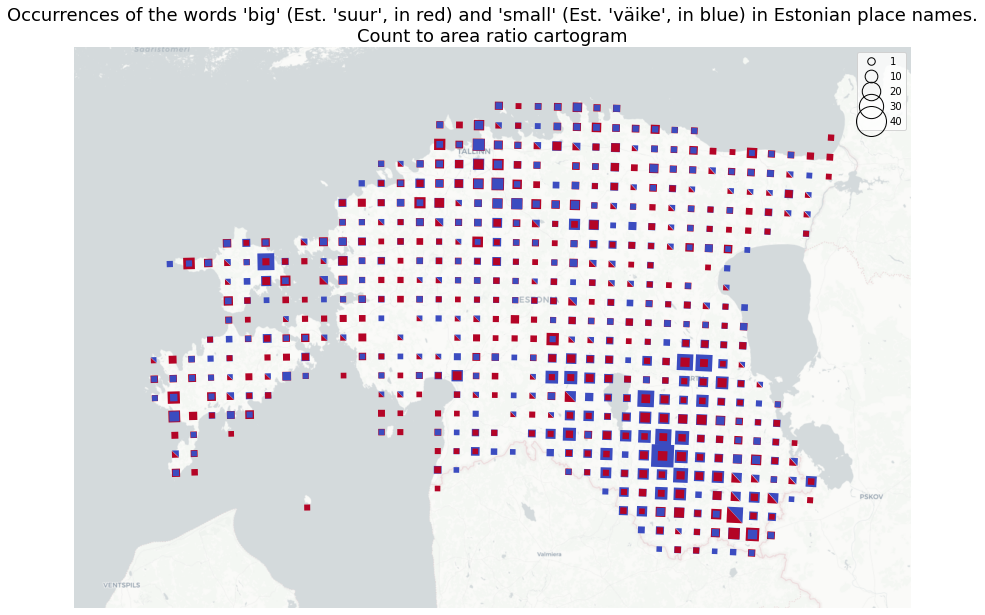

In [80]:
aggs84 = aggs84.sort_values(by='count', ascending=False)

ax = gplt.webmap(df=aggs84, projection=gcrs.WebMercator(), zoom=8, provider=ctx.providers.CartoDB.Positron, figsize=(15,12))

ax = gplt.cartogram(
    aggs84, scale='count', projection=gcrs.WebMercator(),
    # legend_kwargs={'bbox_to_anchor': (1, 1)},
    legend_var='scale',
    legend=True, 
    hue='big_small',
    # scheme=scheme,
    cmap='coolwarm',
    limits=(0.3, 1.2),
    ax=ax
)


# set a title
plt.title("Occurrences of the words 'big' (Est. 'suur', in red) and 'small' (Est. 'väike', in blue) in Estonian place names.\nCount to area ratio cartogram", fontsize=18)
plt.savefig("../source/_static/day-27-bigsmall.png", bbox_inches='tight')

In [83]:
aggs84.to_crs('ESRI:54030')

,idx,geometry,count,big_small
311,654,"POLYGON ((2039520.426 6135396.895, 2038359.455...",40,-1
292,633,"POLYGON ((2022927.837 6162420.418, 2021742.563...",26,-1
42,160,"POLYGON ((1749909.183 6226348.430, 1748253.571...",26,-1
359,707,"POLYGON ((2060024.891 6179142.283, 2058907.272...",26,-1
337,683,"POLYGON ((2046866.386 6179515.415, 2045725.834...",25,-1
...,...,...,...,...
341,687,"POLYGON ((2042302.355 6214993.112, 2041160.678...",1,-1
339,685,"POLYGON ((2044584.960 6197264.985, 2043443.791...",1,-1
727,593,"POLYGON ((1986853.517 6233980.560, 1985617.246...",1,1
326,671,"POLYGON ((2019726.354 6286043.523, 2018559.544...",1,-1
